In [108]:
import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt
from sklearn import preprocessing
from kmodes.kprototypes import KPrototypes

%matplotlib inline
plt.style.use('seaborn-notebook')

In [89]:
%store -r

In [90]:
df_norm = df.copy()
df_norm.set_index('user_id', inplace=True)

In [92]:
numeric_cols = list(df.select_dtypes('float64').columns)
scaler = preprocessing.MinMaxScaler()
df_norm[numeric_cols] = scaler.fit_transform(df_norm[numeric_cols])

In [93]:
df_norm.head()

,age,annual_income,country,duolingo_platform,duolingo_subscriber,duolingo_usage,employment_status,gender,primary_language_commitment,primary_language_review,...,primary_language_proficiency,student,used_other_resources,highest_course_progress,took_placement_test,purchased_subscription,n_days_on_platform,has_daily_goal,pct_days_active,log_lessons_per_day
user_id,,,,,,,,,,,,,,,,,,,,,
35c9fc6e72c911e99681dca9049399ef,18-34,"$26,000 - $75,000",JP,Android phone or tablet,"No, I have never paid for Duolingo Plus",Daily,Employed full-time,Male,I'm very committed to learning this language.,I am using Duolingo to review a language I've ...,...,Advanced,Not currently a student,True,0.731183,True,False,0.352917,False,0.937500,0.572682
35c9fdde72c911e98630dca9049399ef,18-34,"$26,000 - $75,000",JP,iPhone or iPad,"No, I have never paid for Duolingo Plus",Weekly,Employed full-time,Male,I'm slightly committed to learning this language.,I am using Duolingo to review a language I've ...,...,Intermediate,Not currently a student,True,0.150538,True,False,0.051250,True,0.552083,0.528509
35c9feb072c911e9ab4cdca9049399ef,18-34,"$76,000 - $150,000",JP,iPhone or iPad,"Yes, I currently pay for Duolingo Plus",Daily,Employed full-time,Male,I'm moderately committed to learning this lang...,I am using Duolingo to review a language I've ...,...,Beginner,Not currently a student,True,0.225806,False,True,0.198750,False,0.302083,0.526409
35c9ff7072c911e9900ddca9049399ef,18-34,"$76,000 - $150,000",JP,iPhone or iPad,"No, but I have previously paid for Duolingo Plus",Daily,Employed full-time,Female,I'm very committed to learning this language.,I am using Duolingo to learn this language for...,...,Intermediate,Not currently a student,True,0.225806,False,True,0.047917,True,0.958333,0.737771
35ca002672c911e99effdca9049399ef,35 - 54,"$76,000 - $150,000",JP,Android phone or tablet,"Yes, I currently pay for Duolingo Plus",Daily,Employed full-time,Male,I'm very committed to learning this language.,I am using Duolingo to learn this language for...,...,Intermediate,Not currently a student,True,0.795699,False,True,0.812083,False,0.875000,0.571862


In [85]:
df_norm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4614 entries, 35c9fc6e72c911e99681dca9049399ef to 35cf7a1772c911e9b029dca9049399ef
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   age                           4614 non-null   category
 1   annual_income                 4614 non-null   category
 2   country                       4614 non-null   category
 3   duolingo_platform             4614 non-null   category
 4   duolingo_subscriber           4614 non-null   category
 5   duolingo_usage                4614 non-null   category
 6   employment_status             4614 non-null   category
 7   gender                        4614 non-null   category
 8   primary_language_commitment   4614 non-null   category
 9   primary_language_review       4614 non-null   category
 10  primary_language_motivation   4614 non-null   category
 11  primary_language_proficiency  4614 non-null   category

In [94]:
catColumnsPos = [df_norm.columns.get_loc(col) for col in list(df_norm.select_dtypes(['bool','category']).columns)]
print('Categorical columns           : {}'.format(list(df.select_dtypes(['bool','category']).columns)))
print('Categorical columns position  : {}'.format(catColumnsPos))

Categorical columns           : ['age', 'annual_income', 'country', 'duolingo_platform', 'duolingo_subscriber', 'duolingo_usage', 'employment_status', 'gender', 'primary_language_commitment', 'primary_language_review', 'primary_language_motivation', 'primary_language_proficiency', 'student', 'used_other_resources', 'took_placement_test', 'purchased_subscription', 'has_daily_goal']
Categorical columns position  : [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16, 18]


In [95]:
dfMatrix = df_norm.to_numpy()

array([['18-34', '$26,000 - $75,000', 'JP', ..., False,
        0.9374999999999999, 0.5726817466149132],
       ['18-34', '$26,000 - $75,000', 'JP', ..., True,
        0.5520833333333333, 0.5285086705781404],
       ['18-34', '$76,000 - $150,000', 'JP', ..., False,
        0.30208333333333326, 0.5264091269465605],
       ...,
       ['35 - 54', '$26,000 - $75,000', 'GB', ..., True,
        0.19791666666666663, 0.6487362475580389],
       ['55 - 74', '$151,000 or more', 'GB', ..., True,
        0.5624999999999999, 0.49278260009174196],
       ['55 - 74', '$26,000 - $75,000', 'FR', ..., False,
        0.4791666666666666, 0.6339191956287543]], dtype=object)

In [96]:
#let's try to run up to 15 clusters
cost = []
for cluster in range(1, 16):
    try:
        kprototype = KPrototypes(n_jobs = -1, n_clusters = cluster, init = 'Huang', random_state = 42)
        kprototype.fit_predict(dfMatrix, categorical = catColumnsPos)
        cost.append(kprototype.cost_)
        print('Cluster initiation: {}'.format(cluster))
    except:
        break

Cluster initiation: 1
Cluster initiation: 2
Cluster initiation: 3
Cluster initiation: 4
Cluster initiation: 5
Cluster initiation: 6
Cluster initiation: 7
Cluster initiation: 8
Cluster initiation: 9


In [100]:
df_cost = pd.DataFrame({'Cluster':range(1, 10), 'Cost':cost})

,Cluster,Cost
0,1,6376.549030
1,2,5461.276614
2,3,5075.332122
3,4,4897.257881
4,5,4760.894062
5,6,4596.685241
6,7,4526.213339
7,8,4392.090862
8,9,4366.997749


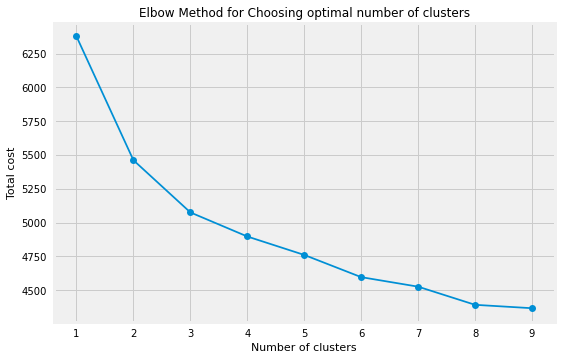

In [155]:
fig, ax = plt.subplots()
ax.plot(df_cost['Cluster'], df_cost['Cost'], 'o-')
ax.set_xlabel('Number of clusters')
ax.set_ylabel('Total cost')
ax.set_title('Elbow Method for Choosing optimal number of clusters')
plt.show()

In [111]:
kprototype = KPrototypes(n_jobs = -1, n_clusters = 3, init = 'Huang', random_state = 42)
kprototype.fit_predict(dfMatrix, categorical = catColumnsPos)

array([0, 0, 2, ..., 2, 1, 0], dtype=uint16)

In [112]:
kprototype.cluster_centroids_

array([['0.4900457787714305', '0.3089392189218926', '0.6410478547854769',
        '0.6162199923687922', '35 - 54', '$0 - $10,000', 'RU',
        'Android phone or tablet',
        'No, I have never paid for Duolingo Plus', 'Daily',
        'Employed full-time', 'Male',
        "I'm very committed to learning this language.",
        "I am using Duolingo to review a language I've studied before.",
        'I need to be able to speak the local language where I live',
        'Intermediate', 'Not currently a student', 'True', 'True',
        'False', 'False'],
       ['0.48563004806501203', '0.30833845366103396',
        '0.7757856502816164', '0.6244664318148689', '55 - 74',
        '$26,000 - $75,000', 'JP', 'iPhone or iPad',
        'Yes, I currently pay for Duolingo Plus', 'Daily',
        'Employed full-time', 'Female',
        "I'm very committed to learning this language.",
        'I am using Duolingo to learn this language for the first time.',
        'I want to connect with my h

In [113]:
kprototype.n_iter_

7

In [116]:
df['Cluster Labels'] = kprototype.labels_
df['Segment'] = df['Cluster Labels'].map({0:'A', 1:'B', 2:'C'})

In [117]:
df['Segment'] = df['Segment'].astype('category')
df['Segment'] = df['Segment'].cat.reorder_categories(['A','B','C'])

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4614 entries, 0 to 6185
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   user_id                       4614 non-null   object  
 1   age                           4614 non-null   category
 2   annual_income                 4614 non-null   category
 3   country                       4614 non-null   category
 4   duolingo_platform             4614 non-null   category
 5   duolingo_subscriber           4614 non-null   category
 6   duolingo_usage                4614 non-null   category
 7   employment_status             4614 non-null   category
 8   gender                        4614 non-null   category
 9   primary_language_commitment   4614 non-null   category
 10  primary_language_review       4614 non-null   category
 11  primary_language_motivation   4614 non-null   category
 12  primary_language_proficiency  4614 non-null   ca

In [153]:
df.rename(columns = {'Cluster Labels':'Total'}, inplace = True)
summary = df.groupby('Segment').agg(
    {
        'Total':'count',
        'country': lambda x: x.value_counts().index[0],
        'employment_status': lambda x: x.value_counts().index[0],
        'student': lambda x: x.value_counts().index[0],
        'gender': lambda x: x.value_counts().index[0],
        'age': lambda x: x.value_counts().index[0],
#         'age': lambda x: x.cat.categories[np.median(x.cat.codes).astype(int)],
        'annual_income': lambda x: x.cat.categories[np.median(x.cat.codes).astype(int)],
#         'annual_income': lambda x: x.value_counts().index[0],
        'duolingo_platform': lambda x: x.value_counts().index[0],
        'duolingo_subscriber': lambda x: x.value_counts().index[0],
#         'duolingo_usage' : lambda x: x.value_counts().index[0],
        'duolingo_usage': lambda x: x.cat.categories[np.median(x.cat.codes).astype(int)],
        'pct_days_active': 'mean',
        'primary_language_commitment': lambda x: x.cat.categories[np.median(x.cat.codes).astype(int)],
        'primary_language_proficiency': lambda x: x.cat.categories[np.median(x.cat.codes).astype(int)],
        'primary_language_review': lambda x: x.value_counts().index[0],
        'primary_language_motivation': lambda x: x.value_counts().index[0],
        'used_other_resources': lambda x: x.value_counts().index[0],
        'purchased_subscription': lambda x: x.value_counts().index[0],
        'has_daily_goal': lambda x: x.value_counts().index[0],
        'n_days_on_platform': 'mean',
        'highest_course_progress': 'mean',
        'log_lessons_per_day': 'mean'
    }
).reset_index()

In [154]:
summary['lessons_per_day'] = np.exp(summary['log_lessons_per_day'])-1
summary.drop(columns=['log_lessons_per_day'], inplace=True)
summary

,Segment,Total,country,employment_status,student,gender,age,annual_income,duolingo_platform,duolingo_subscriber,...,primary_language_commitment,primary_language_proficiency,primary_language_review,primary_language_motivation,used_other_resources,purchased_subscription,has_daily_goal,n_days_on_platform,highest_course_progress,lessons_per_day
0,First,1515,RU,Employed full-time,Not currently a student,Male,35 - 54,"$11,000 - $25,000",Android phone or tablet,"No, I have never paid for Duolingo Plus",...,I'm very committed to learning this language.,Intermediate,I am using Duolingo to review a language I've ...,I need to be able to speak the local language ...,True,False,False,743.454125,35.574257,2.876069
1,Second,1302,JP,Employed full-time,Not currently a student,Female,55 - 74,"$26,000 - $75,000",iPhone or iPad,"Yes, I currently pay for Duolingo Plus",...,I'm very committed to learning this language.,Beginner,I am using Duolingo to learn this language for...,I want to connect with my heritage or identity,True,True,True,742.012289,35.163594,3.196170
2,Third,1797,GB,Employed full-time,Not currently a student,Female,18-34,"$11,000 - $25,000",Android phone or tablet,"No, I have never paid for Duolingo Plus",...,I'm moderately committed to learning this lang...,Beginner,I am using Duolingo to learn this language for...,I need to be able to speak the local language ...,True,False,False,461.380078,16.716750,2.892024
